In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Google Scholar

In [4]:
filepath = "gc_llm4se.csv"
df = pd.read_csv(filepath)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           200 non-null    int64  
 1   Authors         200 non-null    object 
 2   Title           200 non-null    object 
 3   Year            200 non-null    int64  
 4   Source          196 non-null    object 
 5   Publisher       200 non-null    object 
 6   ArticleURL      200 non-null    object 
 7   CitesURL        198 non-null    object 
 8   GSRank          200 non-null    int64  
 9   QueryDate       200 non-null    object 
 10  Type            12 non-null     object 
 11  DOI             52 non-null     object 
 12  ISSN            0 non-null      float64
 13  CitationURL     0 non-null      float64
 14  Volume          0 non-null      float64
 15  Issue           0 non-null      float64
 16  StartPage       0 non-null      float64
 17  EndPage         0 non-null      flo

In [14]:
keywords = ['survey', 'review']
pattern = '|'.join(keywords)
# case True means case sensitive
filter_df = df[~df['Title'].str.contains(pattern, case=False)]

In [15]:
print(filter_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 4 to 199
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cites           181 non-null    int64  
 1   Authors         181 non-null    object 
 2   Title           181 non-null    object 
 3   Year            181 non-null    int64  
 4   Source          177 non-null    object 
 5   Publisher       181 non-null    object 
 6   ArticleURL      181 non-null    object 
 7   CitesURL        179 non-null    object 
 8   GSRank          181 non-null    int64  
 9   QueryDate       181 non-null    object 
 10  Type            12 non-null     object 
 11  DOI             50 non-null     object 
 12  ISSN            0 non-null      float64
 13  CitationURL     0 non-null      float64
 14  Volume          0 non-null      float64
 15  Issue           0 non-null      float64
 16  StartPage       0 non-null      float64
 17  EndPage         0 non-null      float64


In [16]:
filter_df.to_csv('gc_llm4se_filter.csv')

## After Pre-processing

In [11]:
filepath = "Data-extraction.csv"
df = pd.read_csv(filepath, index_col=0)
# Remove unwanted columns
notes_index = df.columns.get_loc('Notes')
df = df.iloc[:, :notes_index + 1]
df_included = df[df['Included?'] == "TRUE"]
print(df_included.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 5.0 to 178.0
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   45 non-null     float64
 1   TITLE                  45 non-null     object 
 2   ABSTRACT               45 non-null     object 
 3   KEYWORDS               39 non-null     object 
 4   AUTHORS                45 non-null     object 
 5   VENUE                  0 non-null      object 
 6   JOURNAL or Conference  0 non-null      float64
 7   DOI                    0 non-null      float64
 8   URL                    45 non-null     object 
 9   CIT                    13 non-null     float64
 10  E1                     45 non-null     object 
 11  E2                     45 non-null     object 
 12  E3                     45 non-null     object 
 13  E4                     45 non-null     object 
 14  I1                     45 non-null     object 
 15  I2      

### Visualize metrics

Metric counts:
Metric_list
pass@k                      20
BLEU                         9
ROUGE-L                      6
Meteor                       4
acc@k                        3
Exact Match                  3
Human Annotators             2
Hallucination Metrics        2
Unit Test                    2
CodeBLEU                     2
LLM-as-Judge                 2
DSR@k                        2
ROUGE-1                      2
Accuracy                     2
ROUGE-2                      2
Key-Value Exact Match        1
NET                          1
MU                           1
TMU                          1
precision@k                  1
Reciprocal Rank (RR)         1
Average Precision (AP)       1
Edit Distance                1
dep@k                        1
NTMU                         1
Key-Value Wildcard Match     1
Precision                    1
ACC                          1
accuracy                     1
Recall                       1
String distance              1
SBERT       

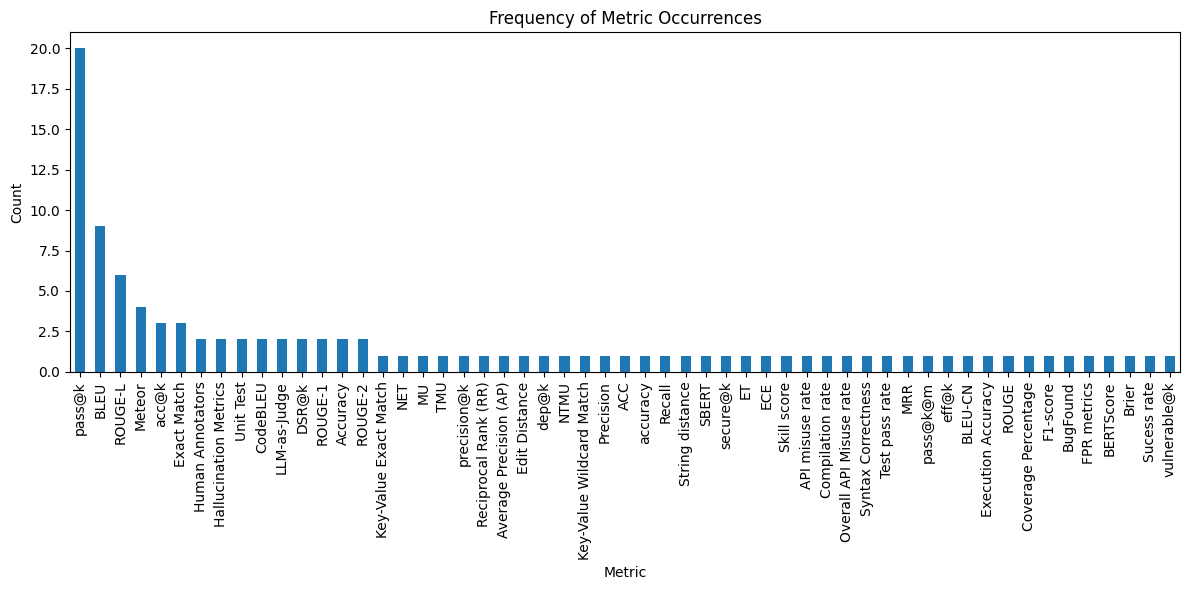

In [12]:
# Drop rows with NaN values in the "Metric" column.
df_included = df_included.dropna(subset=["Metric"])
# Convert the "Metric" column to lowercase.
df["Metric"] = df["Metric"].str.lower()
# Split the "Metric" column by comma into lists.
df_included['Metric_list'] = df_included['Metric'].str.split(',')

# Explode the lists so each metric is on its own row.
metrics_exploded = df_included.explode('Metric_list')

# Clean extra whitespace from each metric.
metrics_exploded['Metric_list'] = metrics_exploded['Metric_list'].str.strip()

# Count the occurrences of each metric.
metric_counts = metrics_exploded['Metric_list'].value_counts()
# metric_counts = metric_counts[:4]
print("Metric counts:")
print(metric_counts)

# Visualize the counts as a bar chart.
plt.figure(figsize=(12, 6))
metric_counts.plot(kind='bar')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Frequency of Metric Occurrences')
plt.tight_layout()
plt.show()

